# Task 1: Exploratory Data Analysis and Feature Engineering

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # may include this
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # display all columns
# pd.set_option('display.max_columns', None)

### 2. Load dataset

In [3]:
# load the US census demographic dataset
data = pd.read_csv('data/acs2017_census_tract_data.csv')

### 3. Data exploration

In [4]:
# check first 5 rows of the dataset
data.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
# check last 5 rows of dataset
data.tail()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5
74000,72153750602,Puerto Rico,Yauco Municipio,3001,1343,1658,99.2,0.8,0.0,0.0,...,4.9,0.0,8.9,21.6,759,75.9,19.1,5.0,0.0,17.9


In [6]:
print("Number of records:", data.shape[0])
print("Number of features:", data.shape[1])
print("\nData types:\n", data.dtypes)

Number of records: 74001
Number of features: 37

Data types:
 TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork    

In [7]:
# check unique values of each column
data.nunique()

TractId             74001
State                  52
County               1955
TotalPop             9881
Men                  5721
Women                5849
Hispanic             1001
White                1001
Black                1001
Native                482
Asian                 775
Pacific               175
VotingAgeCitizen     7452
Income              41832
IncomeErr           19734
IncomePerCap        37193
IncomePerCapErr     11290
Poverty               829
ChildPoverty          956
Professional          869
Service               594
Office                505
Construction          491
Production            518
Drive                 981
Carpool               417
Transit               834
Walk                  596
OtherTransp           289
WorkAtHome            372
MeanCommute           534
Employed             5766
PrivateWork           683
PublicWork            633
SelfEmployed          333
FamilyWork             75
Unemployment          468
dtype: int64

In [8]:
# summary of unique values in categorical variables
categorical_columns = data.select_dtypes(include="object").columns
for column in categorical_columns:
    unique_values = data[column].nunique()
    print("Unique values in", column, ":", unique_values)

Unique values in State : 52
Unique values in County : 1955


In [9]:
# summary statistics for categorical variables
for column in categorical_columns:
    column_stats = data[column].value_counts().reset_index()
    column_stats.columns = [column, "Count"]
    print("\nSummary statistics for", column, ":\n", column_stats)


Summary statistics for State :
                    State  Count
0             California   8057
1                  Texas   5265
2               New York   4918
3                Florida   4245
4           Pennsylvania   3218
5               Illinois   3123
6                   Ohio   2952
7               Michigan   2813
8         North Carolina   2195
9             New Jersey   2010
10               Georgia   1969
11              Virginia   1907
12               Arizona   1526
13               Indiana   1511
14             Tennessee   1497
15         Massachusetts   1478
16            Washington   1458
17             Wisconsin   1409
18              Maryland   1406
19              Missouri   1393
20             Minnesota   1338
21              Colorado   1249
22               Alabama   1181
23             Louisiana   1148
24              Kentucky   1115
25        South Carolina   1103
26              Oklahoma   1046
27           Puerto Rico    945
28                Oregon    834
29     

In [10]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Summary statistics for numerical variables:\n\n", data.describe())

Summary statistics for numerical variables:

             TractId      TotalPop           Men         Women      Hispanic  \
count  7.400100e+04  74001.000000  74001.000000  74001.000000  73305.000000   
mean   2.839113e+10   4384.716017   2157.710707   2227.005311     17.265444   
std    1.647593e+10   2228.936729   1120.560504   1146.240218     23.073811   
min    1.001020e+09      0.000000      0.000000      0.000000      0.000000   
25%    1.303901e+10   2903.000000   1416.000000   1465.000000      2.600000   
50%    2.804700e+10   4105.000000   2007.000000   2082.000000      7.400000   
75%    4.200341e+10   5506.000000   2707.000000   2803.000000     21.100000   
max    7.215375e+10  65528.000000  32266.000000  33262.000000    100.000000   

              White        Black        Native         Asian       Pacific  \
count  73305.000000  73305.00000  73305.000000  73305.000000  73305.000000   
mean      61.309043     13.28910      0.734047      4.753691      0.147341   
std     

In [11]:
# summary of missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64


In [12]:
# calculate the percentage of missing values for each column
missing_percent = data.isnull().mean() * 100

# sort the columns by their missing percentage in descending order
missing_percent_sorted = missing_percent.sort_values(ascending=False)

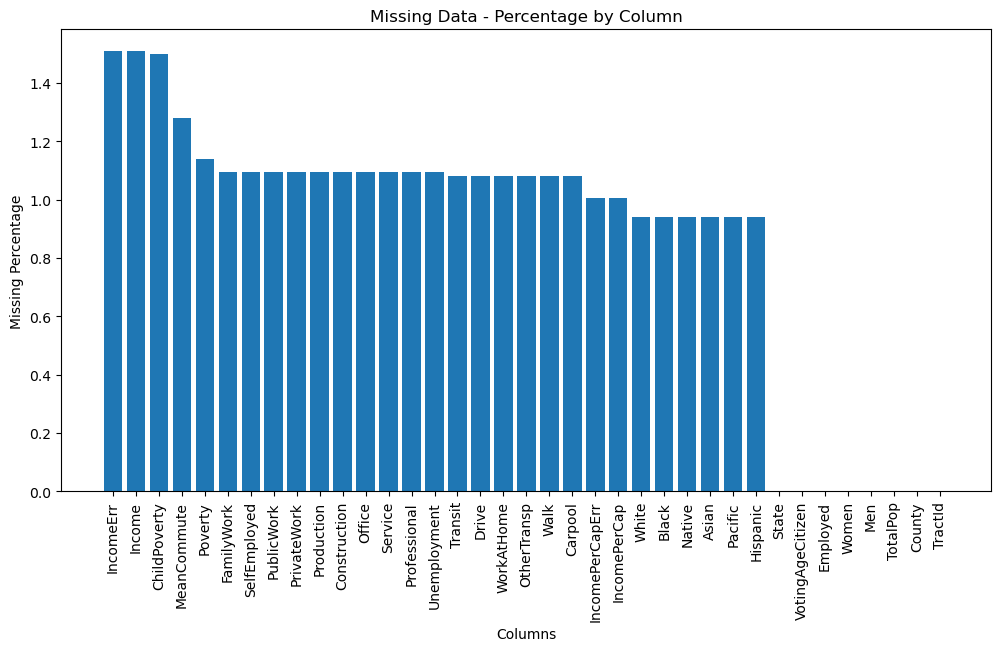

In [13]:
# visualize missing values of the data
plt.figure(figsize=(12, 6))
plt.bar(missing_percent_sorted.index, missing_percent_sorted.values)
plt.title("Missing Data - Percentage by Column")
plt.xlabel("Columns")
plt.ylabel("Missing Percentage")
plt.xticks(rotation=90)
plt.show()

In [14]:
# check duplicates if any
data.duplicated().sum()

0

In [15]:
# summary of zero values
zero_values = (data == 0).sum()
print("Zero values:\n", zero_values)

Zero values:
 TractId                 0
State                   0
County                  0
TotalPop              696
Men                   715
Women                 758
Hispanic             2241
White                 617
Black                7786
Native              43557
Asian               15571
Pacific             63894
VotingAgeCitizen      698
Income                  0
IncomeErr               0
IncomePerCap            0
IncomePerCapErr         0
Poverty               148
ChildPoverty         4972
Professional           73
Service               111
Office                 90
Construction         1011
Production            392
Drive                  49
Carpool               548
Transit             22970
Walk                14752
OtherTransp         14274
WorkAtHome           3576
MeanCommute             0
Employed              811
PrivateWork            14
PublicWork            173
SelfEmployed         1006
FamilyWork          56192
Unemployment          374
dtype: int64


### 4. Data cleaning and preprocessing

**Handling missing values**

In [16]:
# drop columns with high missing percentage
missing_threshold = 10  # Set the threshold percentage for missing values
missing_columns = missing_percent[missing_percent > missing_threshold].index
data.drop(columns=missing_columns, inplace=True)

In [17]:
# fill missing values in numerical columns with mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [18]:
# fill missing values in categorical columns with mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [19]:
# check summary of missing values
new_missing_values = data.isnull().sum()
print("Missing values:\n", new_missing_values)

Missing values:
 TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64


**Handling 0 values**

The `TotalPop` column has many rows with 0 values. Since this is census data and we would be focussing on income and poverty analysis, we will drop such rows.

In [20]:
data.drop(data[data.TotalPop == 0].index, inplace=True)

**Handling outliers**

In [21]:
def drop_outliers(df, feature, threshold=3.5):
    z_scores = (df[feature] - df[feature].mean()) / df[feature].std()
    outliers = df[np.abs(z_scores) > threshold]
    df.drop(outliers.index, inplace=True)
    return len(outliers)

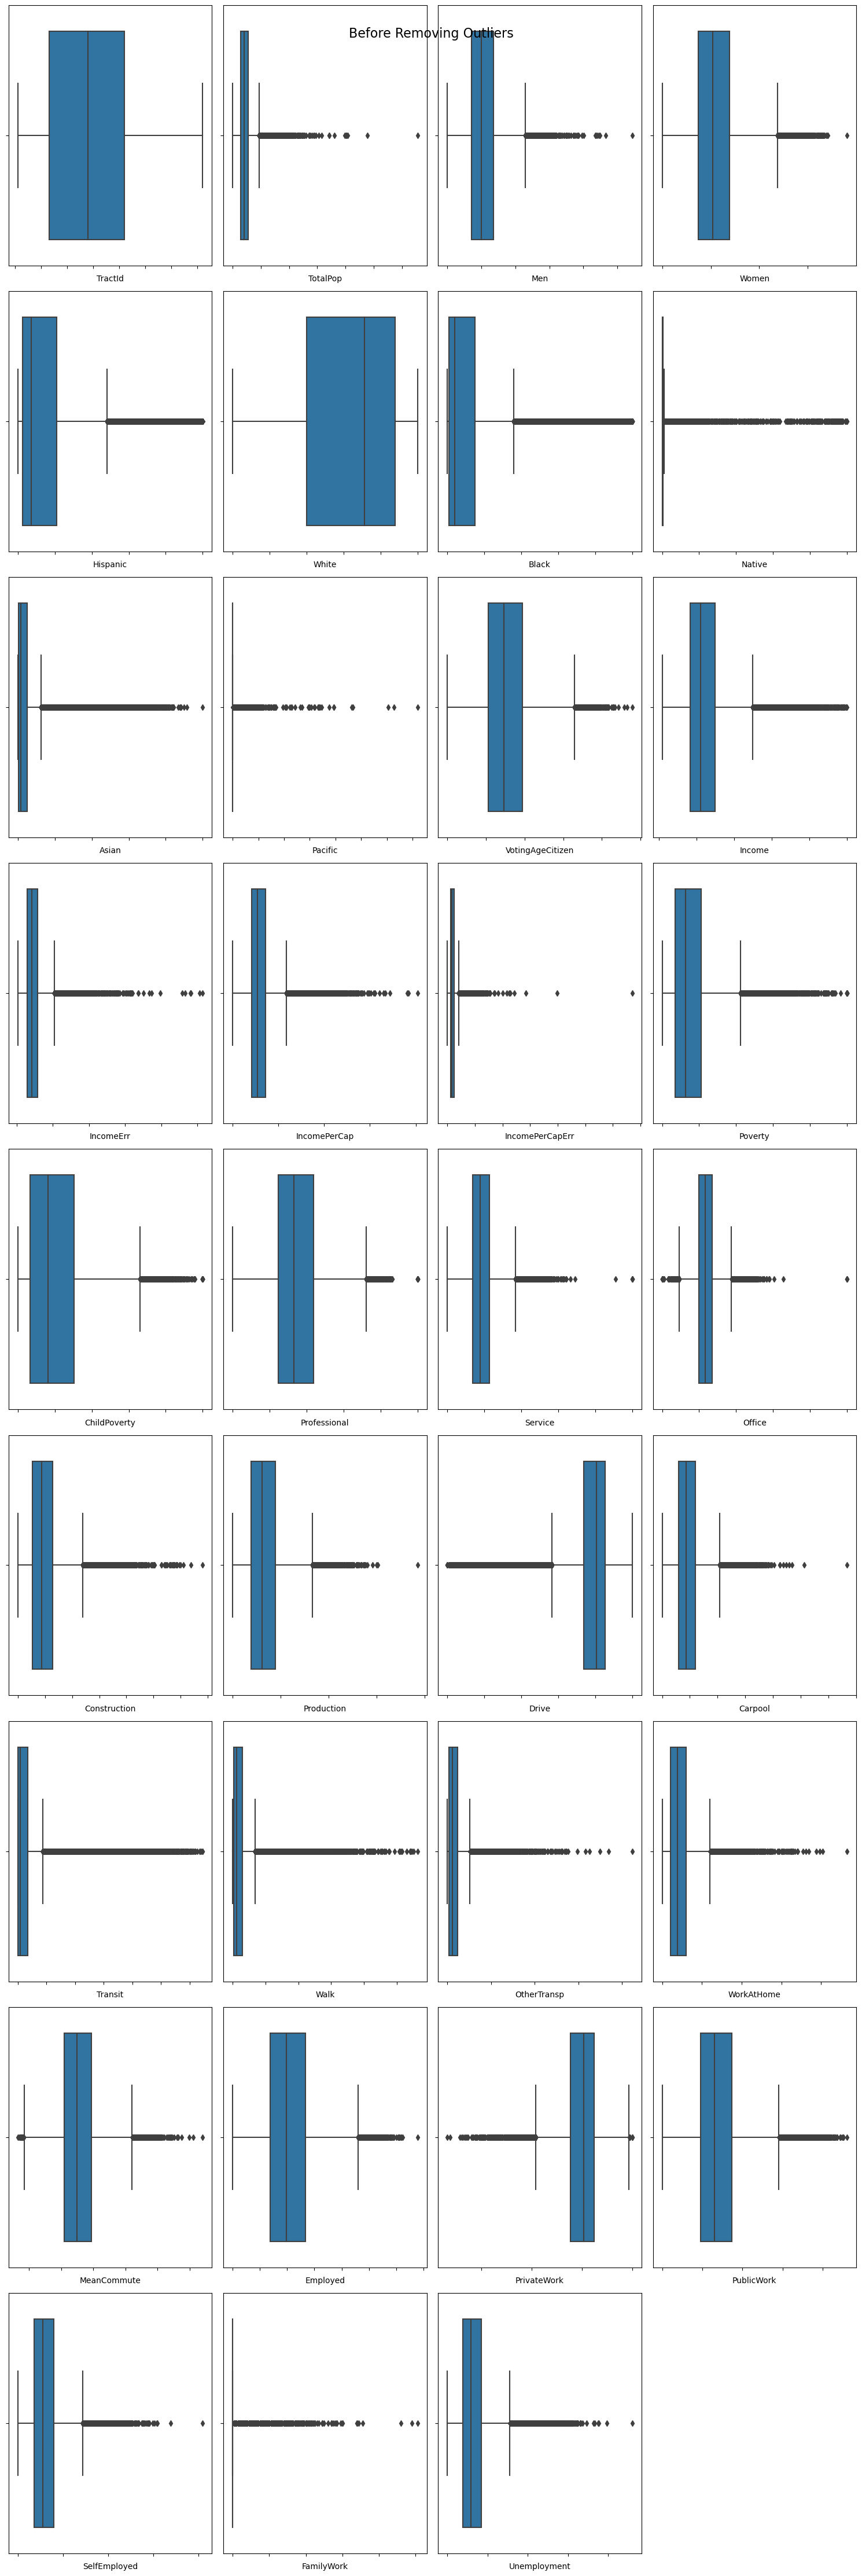

In [22]:
# define the number of subplots per row
num_subplots_per_row = 4

# calculate the number of rows needed for the subplot grid
num_rows = (len(numerical_columns) + num_subplots_per_row - 1) // num_subplots_per_row

# create the subplot grid for before removing outliers
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 5 * num_rows))

# flatten the axes array
axes = axes.flatten()

# initialize counters for outliers
total_outliers = 0
outliers_by_column = {}

# plot boxplots for each feature before removing outliers
for i, feature in enumerate(numerical_columns):
    # calculate the row and column index for the subplot
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row

    # plot boxplot before removing outliers
    ax = axes[i]
    sns.boxplot(data[feature], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis tick labels
    
    # count outliers before removing
    num_outliers = drop_outliers(data, feature)
    outliers_by_column[feature] = num_outliers
    total_outliers += num_outliers

# hide any unused subplots
if len(numerical_columns) % num_subplots_per_row != 0:
    for i in range(len(numerical_columns), num_rows * num_subplots_per_row):
        axes[i].axis('off')

# set a common title for all subplots
fig.suptitle("Before Removing Outliers", fontsize=16)

# adjust the spacing between subplots
plt.tight_layout()

# show the plot for before removing outliers
plt.show()

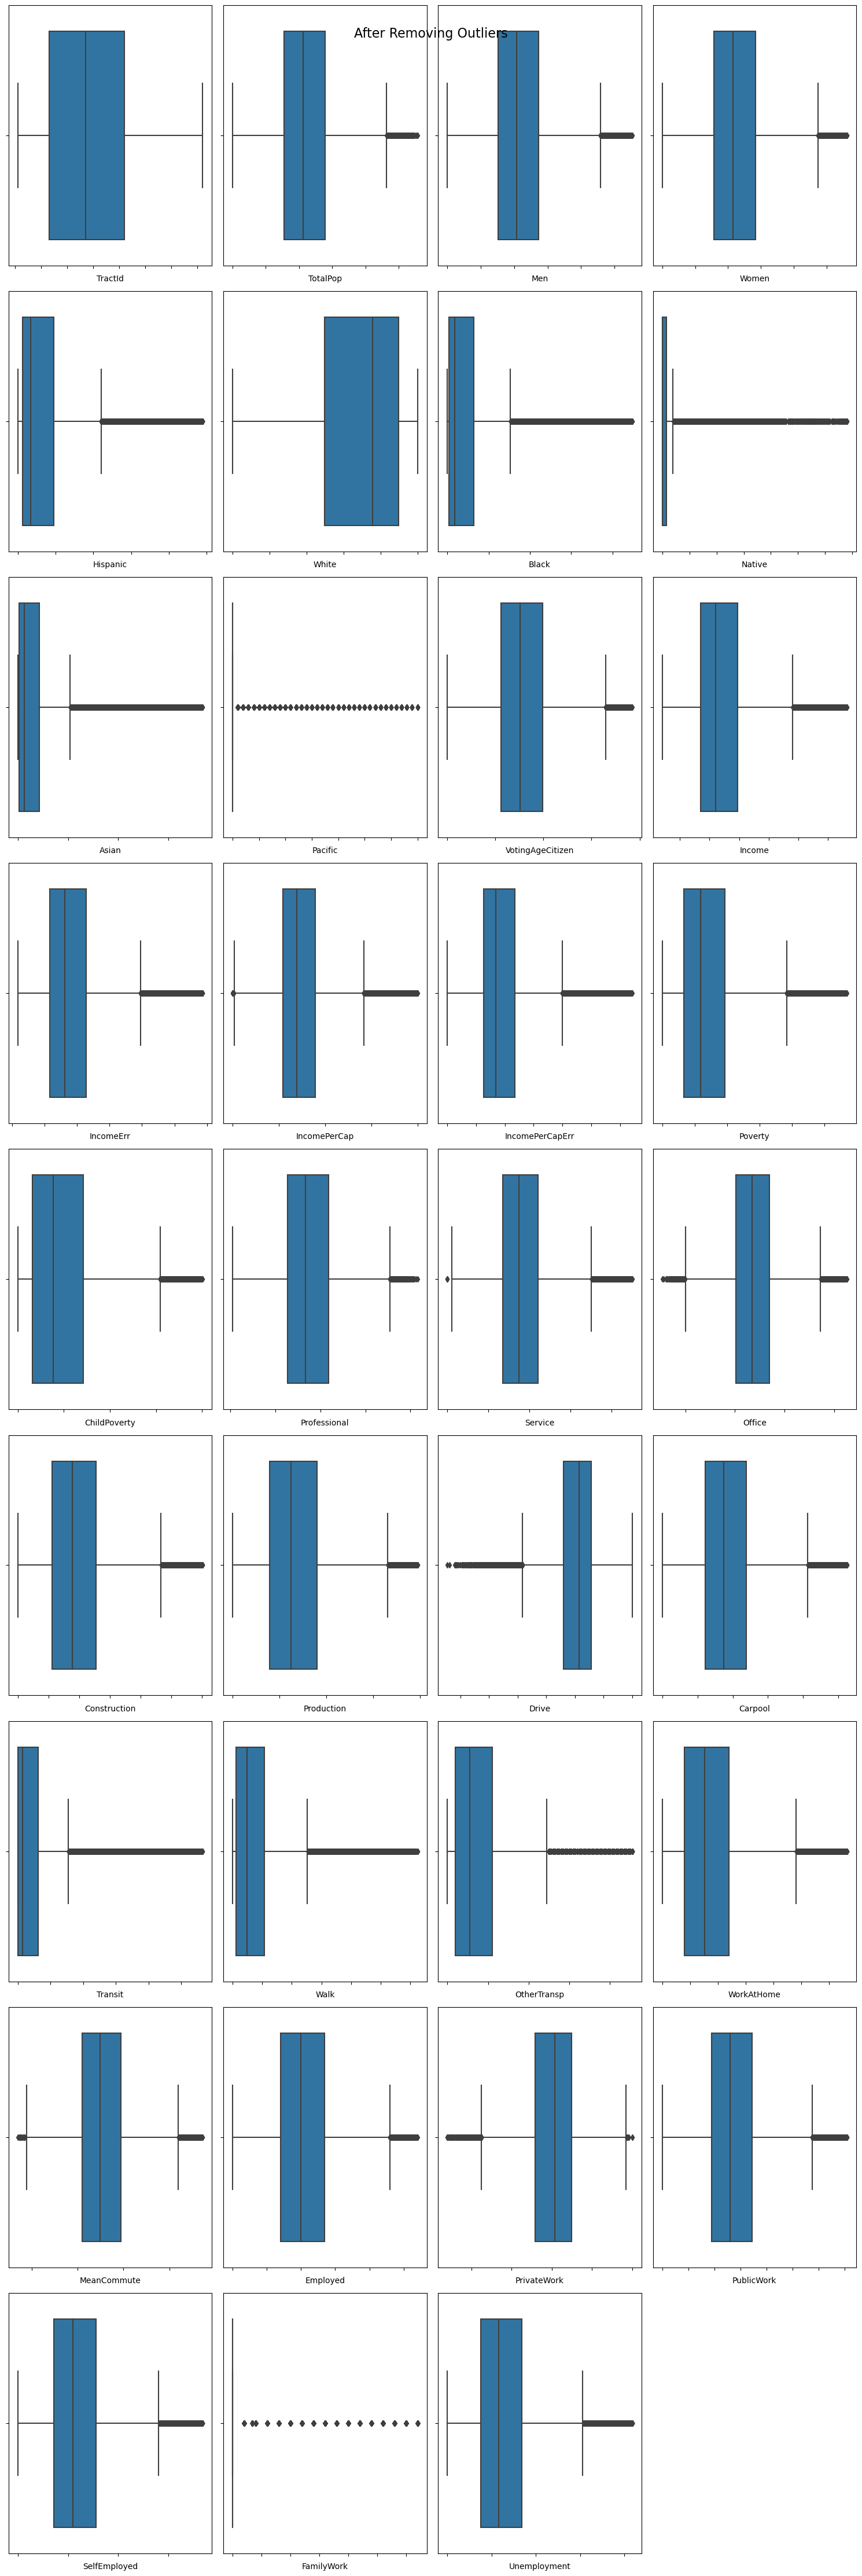

In [23]:
# create the subplot grid for after removing outliers
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 5 * num_rows))

# flatten the axes array
axes = axes.flatten()

# plot boxplots for each feature after removing outliers
for i, feature in enumerate(numerical_columns):
    # calculate the row and column index for the subplot
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row

    # plot boxplot after removing outliers
    ax = axes[i]
    sns.boxplot(data[feature], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis tick labels

# hide any unused subplots
if len(numerical_columns) % num_subplots_per_row != 0:
    for i in range(len(numerical_columns), num_rows * num_subplots_per_row):
        axes[i].axis('off')

# set a common title for all subplots
fig.suptitle("After Removing Outliers", fontsize=16)

# adjust the spacing between subplots
plt.tight_layout()

# show the plot for after removing outliers
plt.show()

In [24]:
print("Number of Outliers by Column:")
for column, num_outliers in outliers_by_column.items():
    print(f"{column}: {num_outliers}")

Number of Outliers by Column:
TractId: 0
TotalPop: 535
Men: 264
Women: 188
Hispanic: 954
White: 0
Black: 1427
Native: 448
Asian: 1367
Pacific: 481
VotingAgeCitizen: 88
Income: 619
IncomeErr: 665
IncomePerCap: 633
IncomePerCapErr: 695
Poverty: 512
ChildPoverty: 121
Professional: 37
Service: 264
Office: 152
Construction: 443
Production: 222
Drive: 1314
Carpool: 391
Transit: 1272
Walk: 936
OtherTransp: 777
WorkAtHome: 474
MeanCommute: 87
Employed: 77
PrivateWork: 251
PublicWork: 279
SelfEmployed: 427
FamilyWork: 829
Unemployment: 521


In [25]:
print("Total Number of Outliers:", total_outliers)

Total Number of Outliers: 17750


In [26]:
data.shape

(55555, 37)

**Data transformation**

In [27]:
# change absolute columns to percentage
absolutes = ['Men','Women','VotingAgeCitizen','Employed']
data[absolutes] = data[absolutes].div(data["TotalPop"], axis="index")*100

In [28]:
data.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,48.726287,51.273713,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,53.729282,46.270718,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,50.717511,49.282489,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3


### 5. Statistical analysis

In [29]:
# calculate statistical measures
data_stats = data.describe().T
data_stats.loc['median'] = data.median()  # add median

In [30]:
print("\nStatistical Measures:")
print(data_stats)


Statistical Measures:
                    count          mean           std           min  \
TractId           55555.0  2.832488e+10  1.591946e+10  1.001020e+09   
TotalPop          55555.0  4.443205e+03  1.800832e+03  3.000000e+00   
Men               55555.0  4.917837e+01  3.928477e+00  0.000000e+00   
Women             55555.0  5.082163e+01  3.928477e+00  0.000000e+00   
Hispanic          55555.0  1.550105e+01  2.066082e+01  0.000000e+00   
White             55555.0  6.704590e+01  2.734657e+01  0.000000e+00   
Black             55555.0  1.097394e+01  1.721379e+01  0.000000e+00   
Native            55555.0  4.624840e-01  1.319066e+00  0.000000e+00   
Asian             55555.0  3.535802e+00  5.573543e+00  0.000000e+00   
Pacific           55555.0  7.819818e-02  3.187489e-01  0.000000e+00   
VotingAgeCitizen  55555.0  7.240456e+01  9.407852e+00  1.182796e+01   
Income            55555.0  6.084361e+04  2.540352e+04  9.905000e+03   
IncomeErr         55555.0  9.140610e+03  4.621818e+03 

In [31]:
# calculate correlation matrix
correlation_matrix = data.corr()

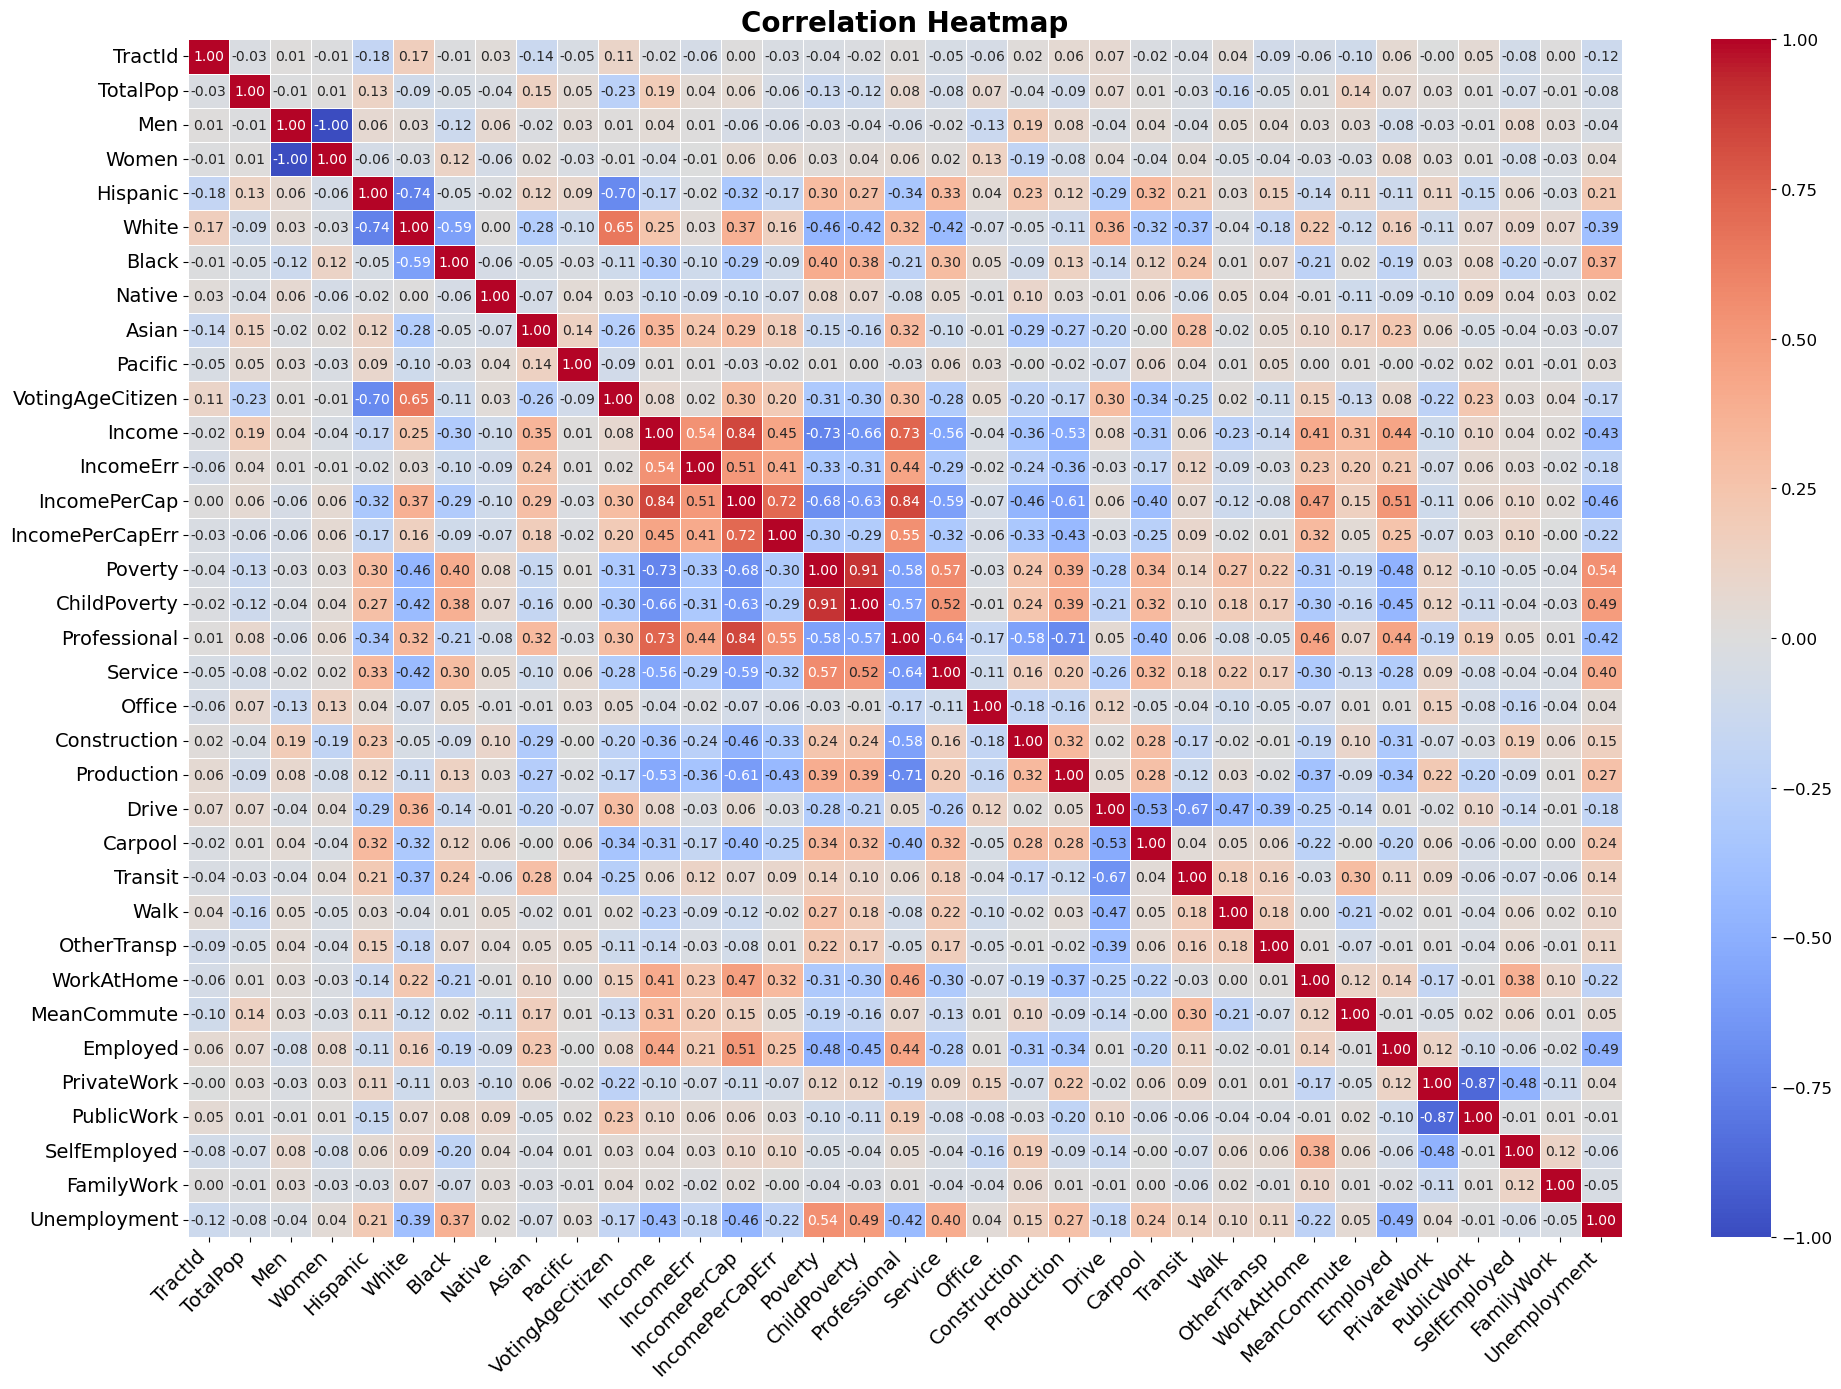

In [32]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# increase font size of y-axis labels and title
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14)
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')

# adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)

# increase spacing between heatmap cells
plt.tight_layout()

# add color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.show()

In [33]:
print("Correlation Coefficients:")
print(correlation_matrix)

Correlation Coefficients:
                   TractId  TotalPop       Men     Women  Hispanic     White  \
TractId           1.000000 -0.026909  0.008103 -0.008103 -0.175136  0.166751   
TotalPop         -0.026909  1.000000 -0.008749  0.008749  0.128319 -0.094718   
Men               0.008103 -0.008749  1.000000 -1.000000  0.062795  0.032013   
Women            -0.008103  0.008749 -1.000000  1.000000 -0.062795 -0.032013   
Hispanic         -0.175136  0.128319  0.062795 -0.062795  1.000000 -0.743823   
White             0.166751 -0.094718  0.032013 -0.032013 -0.743823  1.000000   
Black            -0.010060 -0.050328 -0.124071  0.124071 -0.048090 -0.586960   
Native            0.026025 -0.038224  0.062857 -0.062857 -0.020646  0.003203   
Asian            -0.136098  0.146870 -0.016764  0.016764  0.122315 -0.281224   
Pacific          -0.046855  0.052916  0.032187 -0.032187  0.088371 -0.103109   
VotingAgeCitizen  0.110191 -0.230723  0.012245 -0.012245 -0.703491  0.654980   
Income        

### 6. Feature engineering

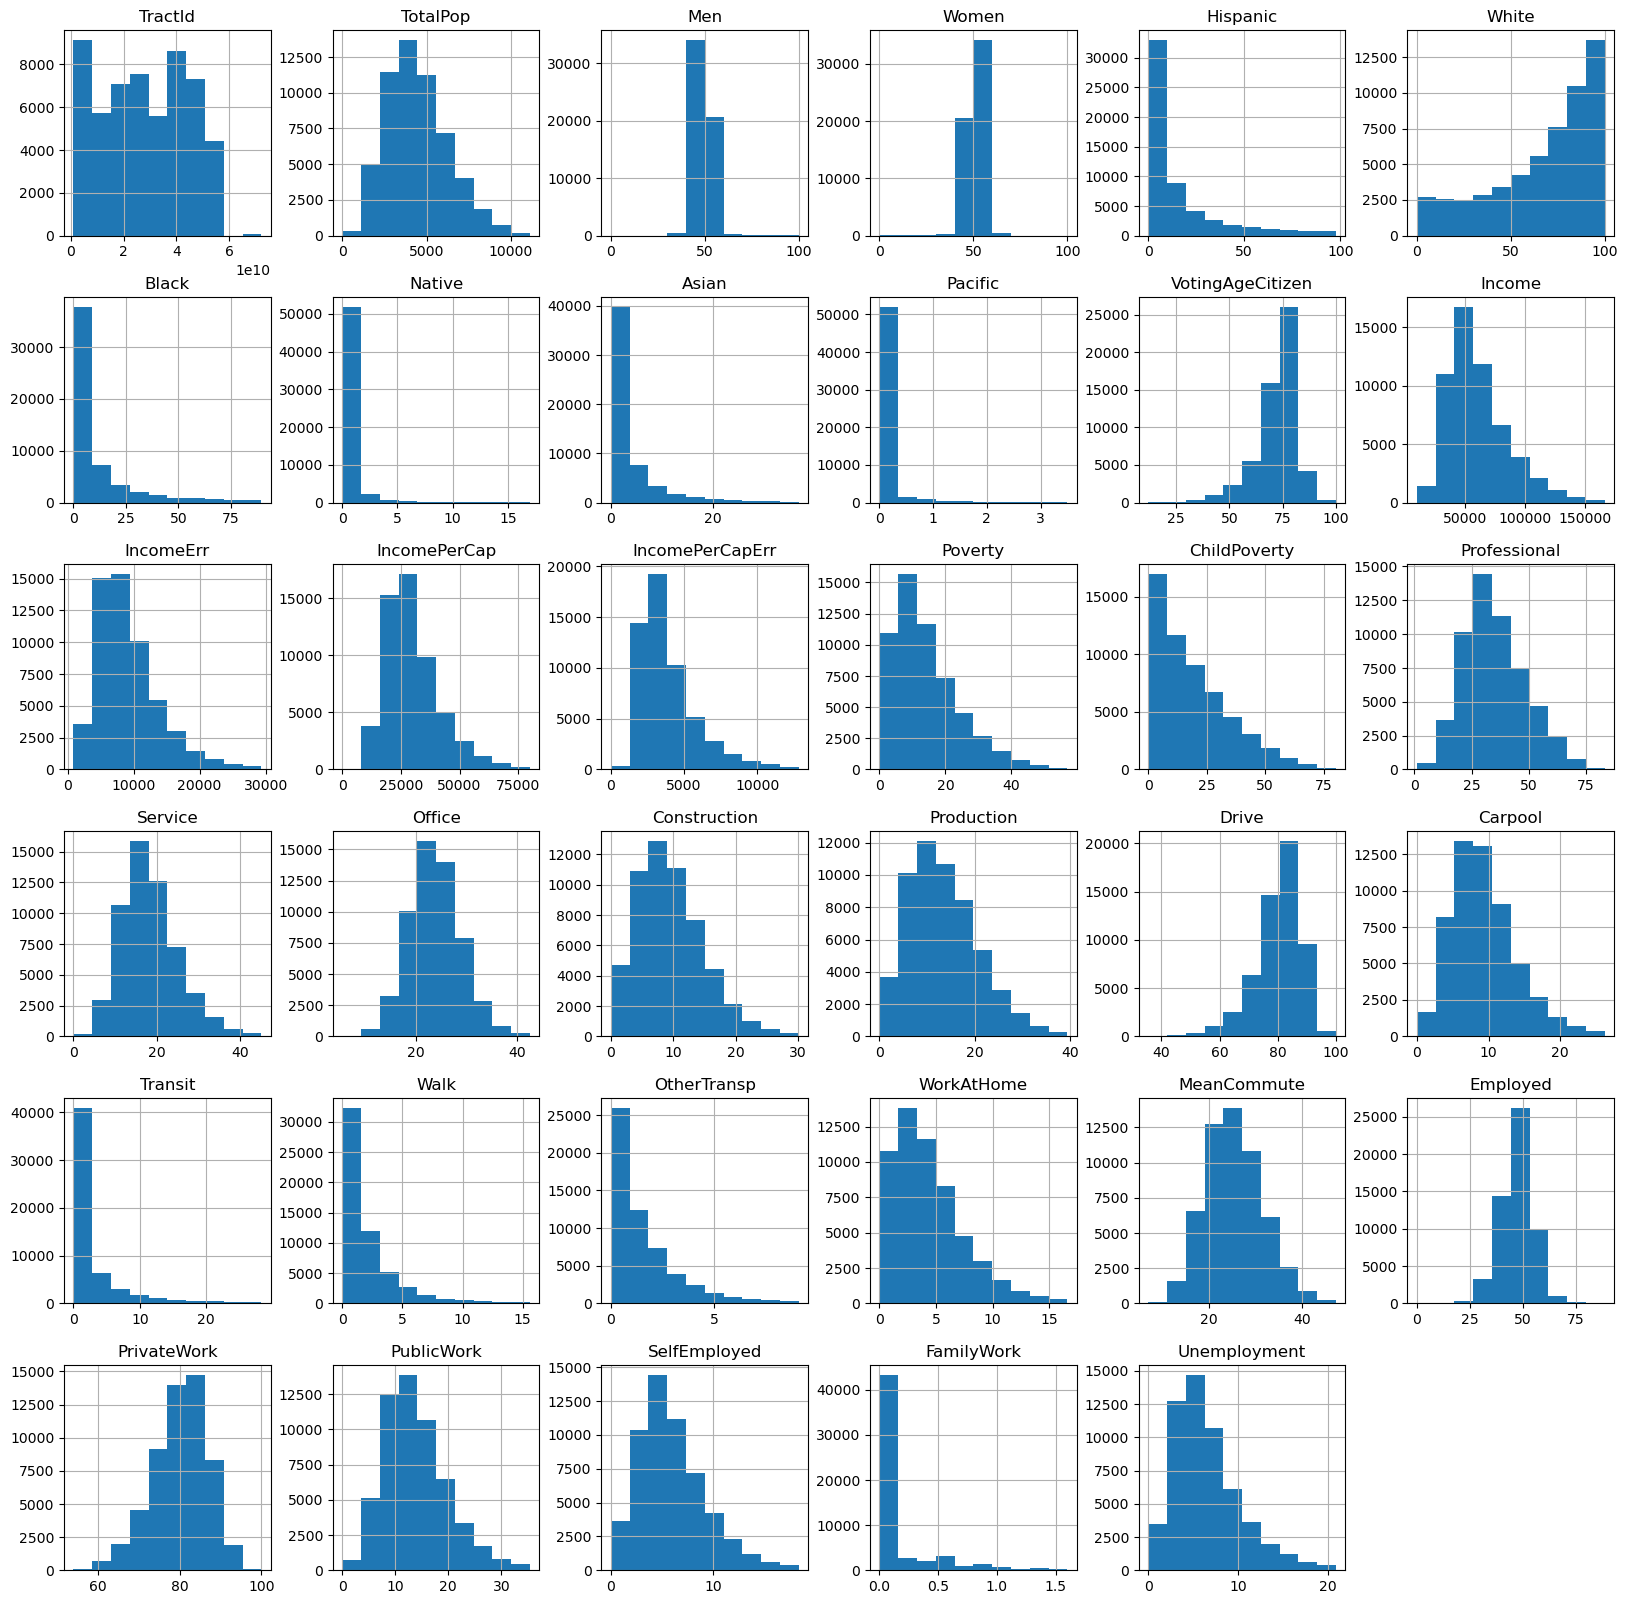

In [34]:
data.hist(figsize = (20,20))
plt.show()

**Drop irrelevant columns**

In [35]:
# 'TrackId' is irrelevant and we don't need 'State', 'County' in our analysis
updated_data = data.drop(['TractId', 'State', 'County'], axis=1)

**Find highly correlated features**

In [36]:
# set the threshold for correlation
correlation_threshold = 0.8

# find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

print("Pairs of Highly Correlated Features:")
for pair in highly_correlated_features:
    print(pair)

Pairs of Highly Correlated Features:
('Men', 'Women')
('Income', 'IncomePerCap')
('IncomePerCap', 'Professional')
('Poverty', 'ChildPoverty')
('PrivateWork', 'PublicWork')


In [37]:
# drop income related columns since we already have our target variable 'Income'
# drop 'TotalPop' because we have 'Men' and 'Women'
# drop 'ChildPoverty' because its highly correlated to 'Poverty'
updated_data.drop(['TotalPop', 'IncomeErr','IncomePerCap','IncomePerCapErr', 'ChildPoverty'], axis=1, inplace=True)

In [38]:
updated_data.head()

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,48.726287,51.273713,2.4,86.3,5.2,0.0,1.2,0.0,76.260163,67826.0,...,0.5,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6
1,53.729282,46.270718,1.1,41.6,54.5,0.0,1.0,0.0,76.058932,41287.0,...,0.0,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4
2,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,0.4,73.264402,46806.0,...,1.0,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7
3,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,0.0,76.329974,55895.0,...,1.5,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1
4,50.717511,49.282489,0.9,77.5,16.4,0.0,3.1,0.0,72.543904,68143.0,...,0.8,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3


In [39]:
updated_data[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].describe()

,Hispanic,White,Black,Native,Asian,Pacific
count,55555.000000,55555.000000,55555.000000,55555.000000,55555.000000,55555.000000
mean,15.501051,67.045895,10.973938,0.462484,3.535802,0.078198
std,20.660825,27.346575,17.213793,1.319066,5.573543,0.318749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000,49.900000,0.800000,0.000000,0.200000,0.000000
50%,6.700000,75.600000,3.600000,0.000000,1.300000,0.000000
75%,19.100000,89.800000,12.700000,0.400000,4.300000,0.000000
max,97.800000,100.000000,89.500000,17.000000,36.800000,3.500000


In [40]:
# since population percentage of 'Native' and 'Pacific' is very less, we will merge these two races
updated_data['OtherRace'] = updated_data['Native'] + updated_data['Pacific']
updated_data.drop(['Native', 'Pacific'], axis=1, inplace=True)
updated_data.head()

,Men,Women,Hispanic,White,Black,Asian,VotingAgeCitizen,Income,Poverty,Professional,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,OtherRace
0,48.726287,51.273713,2.4,86.3,5.2,1.2,76.260163,67826.0,10.7,38.5,...,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6,0.0
1,53.729282,46.270718,1.1,41.6,54.5,1.0,76.058932,41287.0,22.4,30.5,...,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4,0.0
2,45.288035,54.711965,8.0,61.4,26.5,0.7,73.264402,46806.0,14.7,27.9,...,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7,1.0
3,46.894774,53.105226,9.6,80.3,7.1,0.2,76.329974,55895.0,2.3,29.0,...,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1,0.5
4,50.717511,49.282489,0.9,77.5,16.4,3.1,72.543904,68143.0,12.2,48.8,...,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3,0.0


In [41]:
selected_columns = updated_data.columns.tolist()
selected_columns

['Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Asian',
 'VotingAgeCitizen',
 'Income',
 'Poverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'OtherRace']

**Transform features**

In [42]:
categorical_columns = updated_data.select_dtypes(include='object').columns
numerical_columns = updated_data.drop(['Income'], axis=1).select_dtypes(include=[np.number]).columns

In [43]:
# preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Column transformer to apply preprocessing pipelines to specific columns
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

In [44]:
X = updated_data.drop(['Income'], axis=1)
y = updated_data['Income']

In [45]:
# apply preprocessing to the feature matrix
X_preprocessed = preprocessor.fit_transform(X)

**Feature selection**

In [46]:
# PCA
pca = PCA(whiten=True)
X_pca = pca.fit_transform(X_preprocessed)

# calculate the explained variance ratio and cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1 if np.sum(cumulative_variance_ratio >= 0.95) > 0 else X_pca.shape[1]

# transform the feature matrix using the selected number of components
X_pca = X_pca[:, :n_components]

# get the feature indices corresponding to the selected components
selected_indices = pca.components_[0].argsort()[::-1][:n_components]

# get the feature names corresponding to the selected indices
X_pca_selected = X.columns[selected_indices]


In [47]:
print("Explained Variance Ratios:")
for i in range(n_components):
    print("PC{}: {:.2f}%".format(i+1, explained_variance_ratio[i] * 100))

print("\nCumulative Variance Ratio:", cumulative_variance_ratio)
print("\nFeature Variance:\n", X.var())

Explained Variance Ratios:
PC1: 19.13%
PC2: 10.79%
PC3: 9.02%
PC4: 7.81%
PC5: 6.29%
PC6: 5.68%
PC7: 4.49%
PC8: 4.03%
PC9: 3.63%
PC10: 3.54%
PC11: 3.34%
PC12: 3.08%
PC13: 2.95%
PC14: 2.73%
PC15: 2.31%
PC16: 2.28%
PC17: 1.94%
PC18: 1.74%
PC19: 1.64%

Cumulative Variance Ratio: [0.19126133 0.29913896 0.38935226 0.46745946 0.53032947 0.5871289
 0.63200681 0.67227155 0.70860582 0.74405328 0.77740427 0.80822294
 0.83774419 0.8650183  0.88808038 0.91086703 0.93022168 0.94757338
 0.96398982 0.97877317 0.98995716 0.999895   0.99999709 0.99999846
 0.99999953 1.         1.        ]

Feature Variance:
 Men                  15.432931
Women                15.432931
Hispanic            426.869684
White               747.835157
Black               296.314665
Asian                31.064378
VotingAgeCitizen     88.507689
Poverty              97.447646
Professional        177.922129
Service              45.799548
Office               26.438989
Construction         27.624838
Production           52.089254

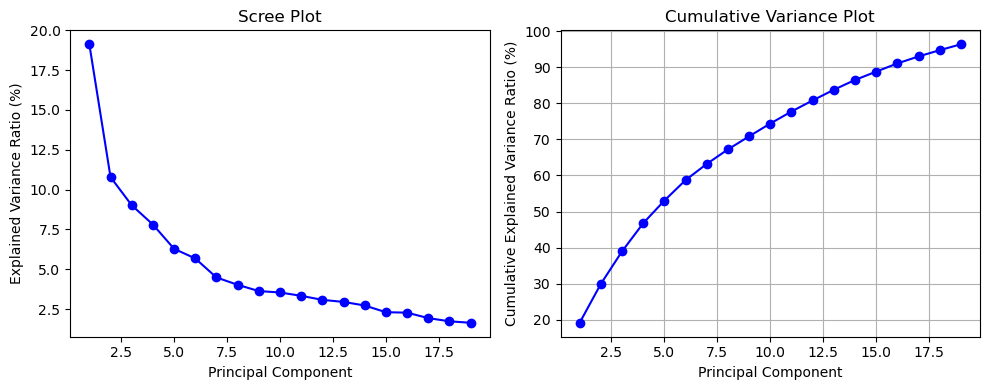

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# scree plot
axes[0].plot(range(1, n_components + 1), explained_variance_ratio[:n_components] * 100, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio (%)')
axes[0].set_title('Scree Plot')

# cumulative variance plot
axes[1].plot(range(1, n_components + 1), cumulative_variance_ratio[:n_components] * 100, 'bo-')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Explained Variance Ratio (%)')
axes[1].set_title('Cumulative Variance Plot')
axes[1].grid(True)

# adjust spacing between subplots
plt.tight_layout()
plt.show()

In [49]:
print("No of componets:", n_components)
print(X_pca_selected)

No of componets: 19
Index(['Poverty', 'Service', 'Unemployment', 'Hispanic', 'Carpool',
       'Production', 'Black', 'Construction', 'Transit', 'PrivateWork',
       'OtherTransp', 'Walk', 'OtherRace', 'Men', 'MeanCommute', 'Office',
       'Women', 'FamilyWork', 'Asian'],
      dtype='object')


In [50]:
# since PCA selected no of components as 19 for explaining 95% of variance of dataset
# we would use same for other techniques
no_of_features = n_components

In [51]:
# SelectKBest
selectKBest = SelectKBest(score_func=f_regression, k=no_of_features)
X_kbest = selectKBest.fit_transform(X_preprocessed, y)

# get the selected feature indices
selected_indices = selectKBest.get_support(indices=True)
X_kbest_selected = X.columns[selected_indices]
print(X_kbest_selected)

Index(['Hispanic', 'White', 'Black', 'Asian', 'Poverty', 'Professional',
       'Service', 'Construction', 'Production', 'Carpool', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'Unemployment', 'OtherRace'],
      dtype='object')


In [52]:
# RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=no_of_features)
X_rfe = rfe.fit_transform(X_preprocessed, y)

# get the selected feature indices
selected_indices = rfe.get_support(indices=True)
X_rfe_selected = X.columns[selected_indices]
print(X_rfe_selected)

Index(['Men', 'Women', 'Hispanic', 'White', 'Asian', 'VotingAgeCitizen',
       'Poverty', 'Professional', 'Office', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork',
       'PublicWork', 'SelfEmployed'],
      dtype='object')


In [53]:
# define the feature selection techniques and their corresponding feature sets
techniques = ['PCA', 'RFE', 'SelectKBest']
feature_sets = [X_pca, X_rfe, X_kbest]

# initialize a dictionary to store scores for each technique
technique_scores = {}
# initialize a dictionary to store the selected features for each technique
selected_features = {}

for technique, X_features in zip(techniques, feature_sets):
    if technique == 'PCA':
        selected_features[technique] = X.columns[:X_features.shape[1]].tolist()
        scoring_metric = 'explained_variance'
    else:
        selected_indices = np.unique(np.where(X_features)[1])
        selected_features[technique] = X.columns[selected_indices].tolist()
        scoring_metric = 'r2'

    # calculate technique scores using cross-validation
    scores = cross_val_score(LinearRegression(), X_features, y, cv=5, scoring=scoring_metric)
    technique_scores[technique] = scores.mean()

# determine the best technique based on the highest score
best_technique = max(technique_scores, key=technique_scores.get)
best_score = technique_scores[best_technique]

print("\nTechnique Scores:")
for technique, score in technique_scores.items():
    print(f"{technique}: {score:.4f}")

print(f"\nBest Technique: {best_technique}")
print(f"Best Score: {best_score:.4f}")

print(f"\nSelected Features (Best Technique: {best_technique}):")
print(selected_features[best_technique])


Technique Scores:
PCA: 0.7164
RFE: 0.7428
SelectKBest: 0.7204

Best Technique: RFE
Best Score: 0.7428

Selected Features (Best Technique: RFE):
['Men', 'Women', 'Hispanic', 'White', 'Black', 'Asian', 'VotingAgeCitizen', 'Poverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']


In [54]:
# Get the selected indices for the best technique
if best_technique == 'PCA':
    selected_indices = np.arange(X_pca.shape[1])
else:
    selected_indices = np.unique(np.where(feature_sets[techniques.index(best_technique)])[1])

# Task 2: Model Building and Evaluation

### 1. Modeling

In [55]:
# Split the data into training and test sets using the selected features
X_selected = X_preprocessed[:, selected_indices]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [57]:
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

X_train: 44444
X_test: 11111
y_train: 44444
y_test: 11111


In [58]:
models = [
    {
        "name": "Linear Regression",
        "regressor": LinearRegression(),
        "accuracy": 0
    },
    {
        "name": "Lasso",
        "regressor": Lasso(),
        "accuracy": 0
    },
    {
        "name": "Ridge",
        "regressor": Ridge(),
        "accuracy": 0
    },
    {
        "name": "Bayesian Ridge",
        "regressor": BayesianRidge(),
        "accuracy": 0
    },
    {
        "name": "K Neighbors Regressor",
        "regressor": KNeighborsRegressor(),
        "accuracy": 0
    },
    {
        "name": "Decision Tree Regressor",
        "regressor": DecisionTreeRegressor(),
        "accuracy": 0
    },
    {
        "name": "Random Forest Regressor",
        "regressor": RandomForestRegressor(),
        "accuracy": 0
    },
    {
        "name": "Gradient Boosting Regressor",
        "regressor": GradientBoostingRegressor(),
        "accuracy": 0
    },
    {
        "name": "XGB Regressor",
        "regressor": XGBRegressor(),
        "accuracy": 0
    }
]

**Evaluation metrics:**

𝑅^2: It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2: The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE: It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

Explained Variance Score: It measures the proportion to which a mathematical model accounts for the variation (dispersion) of a given data set. Often, variation is quantified as variance; then, the more specific term explained variance can be used.

Linear Regression
	Training time: 0.032s
	Prediction time: 0.001s
	Cross-validated R^2: 0.742
	Adjusted R^2: 0.735
	MAE: 9815.938
	MSE: 170305894.920
	RMSE: 13050.130
	Explained Variance Score: 0.736



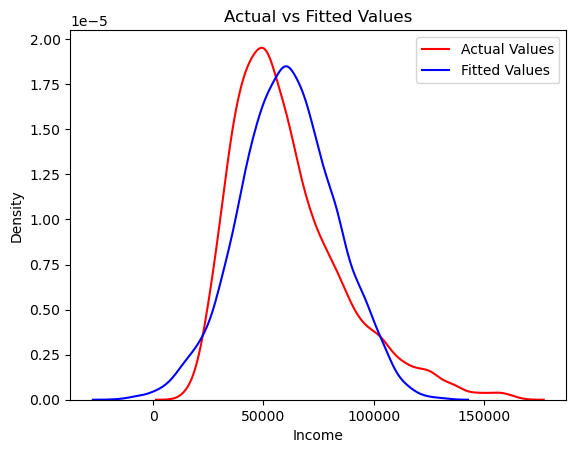

Lasso
	Training time: 0.554s
	Prediction time: 0.000s
	Cross-validated R^2: 0.742
	Adjusted R^2: 0.735
	MAE: 9815.353
	MSE: 170290789.143
	RMSE: 13049.551
	Explained Variance Score: 0.736



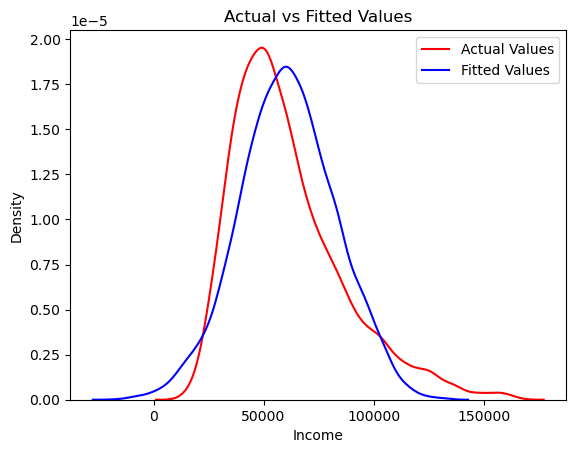

Ridge
	Training time: 0.011s
	Prediction time: 0.000s
	Cross-validated R^2: 0.742
	Adjusted R^2: 0.735
	MAE: 9815.238
	MSE: 170286704.120
	RMSE: 13049.395
	Explained Variance Score: 0.736



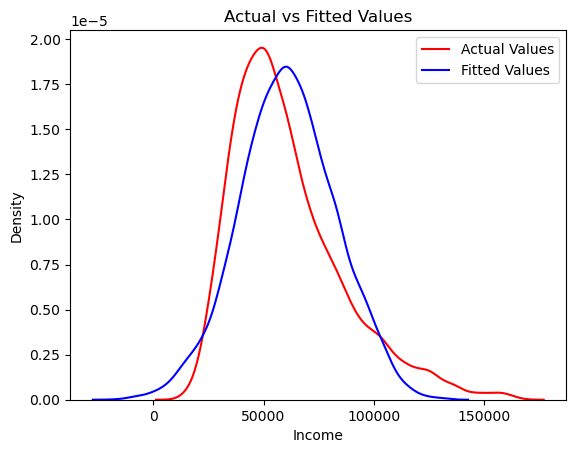

Bayesian Ridge
	Training time: 0.023s
	Prediction time: 0.004s
	Cross-validated R^2: 0.742
	Adjusted R^2: 0.735
	MAE: 9814.943
	MSE: 170283534.967
	RMSE: 13049.273
	Explained Variance Score: 0.736



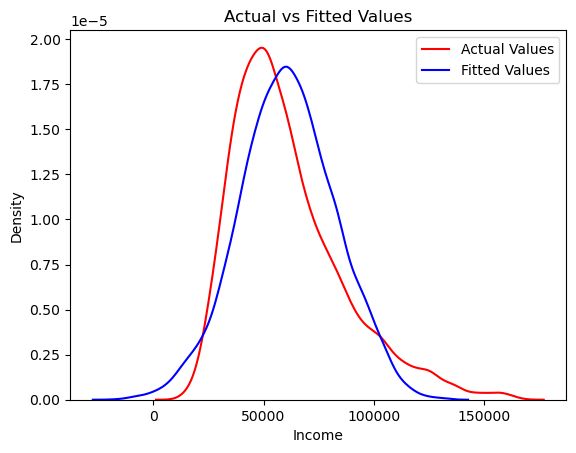

K Neighbors Regressor
	Training time: 0.001s
	Prediction time: 9.059s
	Cross-validated R^2: 0.749
	Adjusted R^2: 0.747
	MAE: 9456.363
	MSE: 162934793.071
	RMSE: 12764.591
	Explained Variance Score: 0.750



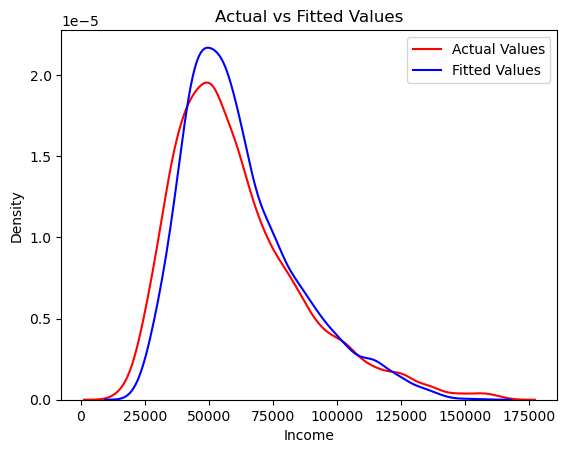

Decision Tree Regressor
	Training time: 0.718s
	Prediction time: 0.005s
	Cross-validated R^2: 0.617
	Adjusted R^2: 0.613
	MAE: 11520.977
	MSE: 248989407.809
	RMSE: 15779.398
	Explained Variance Score: 0.614



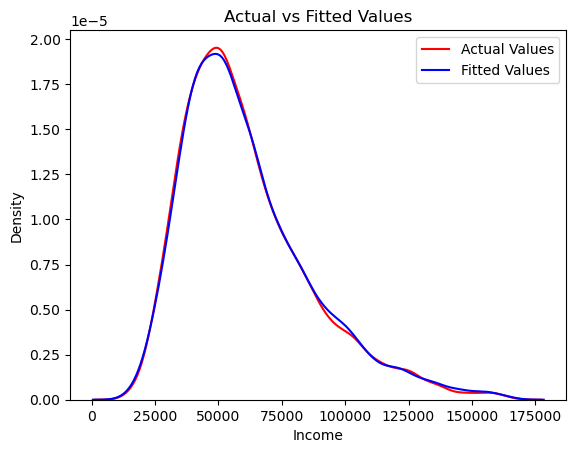

Random Forest Regressor
	Training time: 43.301s
	Prediction time: 0.275s
	Cross-validated R^2: 0.817
	Adjusted R^2: 0.812
	MAE: 8038.222
	MSE: 120939994.238
	RMSE: 10997.272
	Explained Variance Score: 0.812



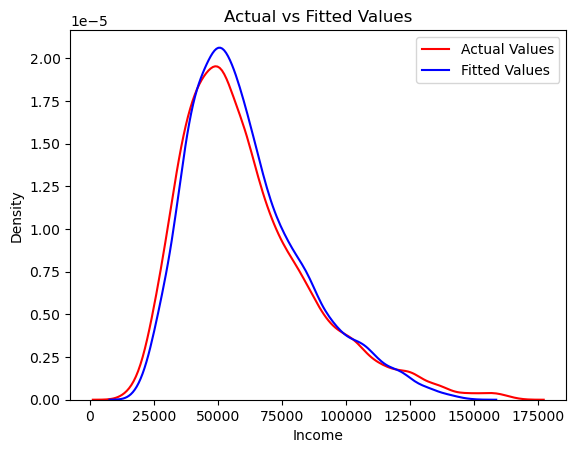

Gradient Boosting Regressor
	Training time: 12.332s
	Prediction time: 0.019s
	Cross-validated R^2: 0.818
	Adjusted R^2: 0.813
	MAE: 8032.548
	MSE: 120239801.442
	RMSE: 10965.391
	Explained Variance Score: 0.813



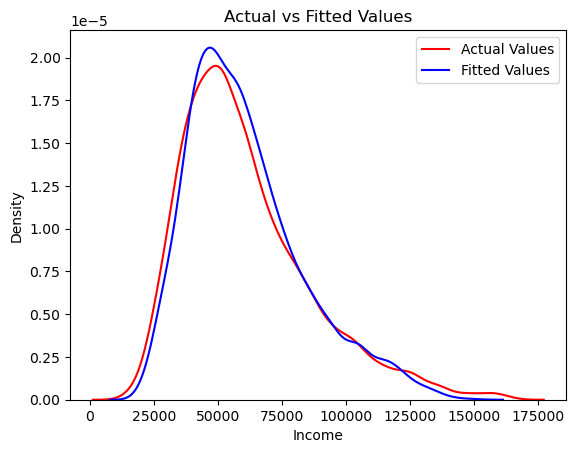

XGB Regressor
	Training time: 2.663s
	Prediction time: 0.011s
	Cross-validated R^2: 0.816
	Adjusted R^2: 0.812
	MAE: 8029.193
	MSE: 121176990.481
	RMSE: 11008.042
	Explained Variance Score: 0.812



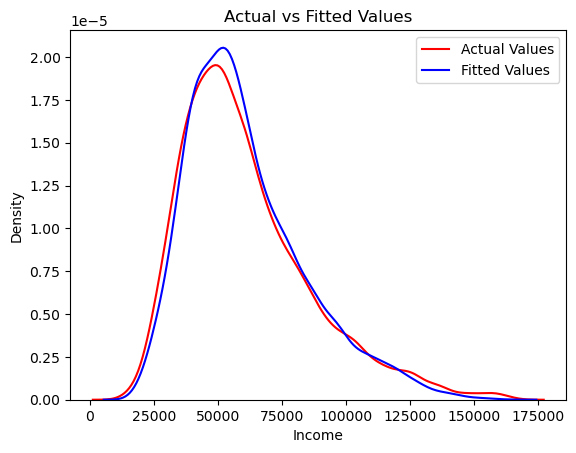

CPU times: user 7min 35s, sys: 44.8 s, total: 8min 19s
Wall time: 5min 39s


In [65]:
%%time
for model in models:
    start = time()
    model["regressor"].fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model["regressor"].predict(X_test)
    predict_time = time()-start
    score = np.mean(cross_val_score(model["regressor"], X_train, y_train, cv=5, scoring="r2"))
    
    print(model["name"])
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tCross-validated R^2: %0.3f" % score)
    print("\tAdjusted R^2: %0.3f" % (1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
    print("\tMAE: %0.3f" % mean_absolute_error(y_test, y_pred))
    print("\tMSE: %0.3f" % mean_squared_error(y_test, y_pred))
    print("\tRMSE: %0.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
    print("\tExplained Variance Score: %0.3f" % explained_variance_score(y_test, y_pred))
    print()
    
    model["accuracy"] = score
    
    plt.figure()
    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
    sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.title('Actual vs Fitted Values')
    plt.xlabel('Income')
    plt.legend()
    plt.show()

### 2. Model comparison

In [69]:
model_comp = pd.DataFrame({
    'Model': [model["name"] for model in models],
    'R-squared Score': [model["accuracy"]*100 for model in models]})
model_comp.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
7,Gradient Boosting Regressor,81.765875
6,Random Forest Regressor,81.713198
8,XGB Regressor,81.641621
4,K Neighbors Regressor,74.889392
1,Lasso,74.200151
2,Ridge,74.199791
3,Bayesian Ridge,74.199696
0,Linear Regression,74.198738
5,Decision Tree Regressor,61.741755


In [70]:
best_model = max(models, key=lambda x: x["accuracy"])
print("Best Model:", best_model["name"])
print("Model Accuracy:", best_model["accuracy"])

Best Model: Gradient Boosting Regressor
Model Accuracy: 0.8176587534316401
